## Work
1. 請改變 reduce_lr 的 patience 和 factor 並比較不同設定下，對訓練/驗證集的影響
2. 請將 optimizer 換成 Adam、RMSprop 搭配 reduce_lr 並比較訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [10]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [11]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [12]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[256, 256, 256]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model

In [13]:
LEARNING_RATE = 1e-3
EPOCHS = 25 # IF you feel too run to finish, try to make it smaller
BATCH_SIZE = 1024 

In [18]:
# 載入 Callbacks
from keras.callbacks import ReduceLROnPlateau

optimizer_set = [keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=0.95),
                 keras.optimizers.Adam(lr=LEARNING_RATE),
                 keras.optimizers.RMSprop(lr=LEARNING_RATE)]

"""Code Here
建立實驗的比較組合
"""


reduce_lr_factor = [0.2, 0.5]
redice_lr_patient = [5, 10]

In [22]:
import itertools
results = {}
for i, (optim, reduce_factor, reduce_patient) in enumerate(itertools.product(optimizer_set, reduce_lr_factor, redice_lr_patient)):
    print("Numbers of exp: %i, reduce_factor: %.2f, reduce_patient: %i" % (i, reduce_factor, reduce_patient))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optim)
    
    """Code Here
    設定 reduce learning rate 的 callback function
    """
    
    
    
    reduce_lr = ReduceLROnPlateau(factor=reduce_factor, 
                              min_lr=1e-12, 
                              monitor='val_loss', 
                              patience=reduce_patient, 
                              verbose=1)
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[reduce_lr]
             )

    # Collect results
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["accuracy"],
                             'valid-acc': model.history.history["val_accuracy"]}

Numbers of exp: 0, reduce_factor: 0.20, reduce_patient: 5
Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_22 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalization_23 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
b

50000/50000 [==============================] - 11s 212us/step - loss: 1.3318 - accuracy: 0.5354 - val_loss: 1.4869 - val_accuracy: 0.4773
Epoch 11/25
50000/50000 [==============================] - 11s 212us/step - loss: 1.3058 - accuracy: 0.5443 - val_loss: 1.4995 - val_accuracy: 0.4694
Epoch 12/25
50000/50000 [==============================] - 10s 202us/step - loss: 1.2820 - accuracy: 0.5558 - val_loss: 1.4809 - val_accuracy: 0.4772
Epoch 13/25
50000/50000 [==============================] - 13s 264us/step - loss: 1.2590 - accuracy: 0.5625 - val_loss: 1.4710 - val_accuracy: 0.4852
Epoch 14/25
50000/50000 [==============================] - 11s 224us/step - loss: 1.2379 - accuracy: 0.5711 - val_loss: 1.4679 - val_accuracy: 0.4852
Epoch 15/25
50000/50000 [==============================] - 14s 283us/step - loss: 1.2178 - accuracy: 0.5793 - val_loss: 1.4546 - val_accuracy: 0.4870
Epoch 16/25
50000/50000 [==============================] - 11s 217us/step - loss: 1.1968 - accuracy: 0.5873 - va

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 10s 199us/step - loss: 2.4105 - accuracy: 0.2189 - val_loss: 2.1562 - val_accuracy: 0.2201
Epoch 2/25
50000/50000 [==============================] - 9s 184us/step - loss: 1.9037 - accuracy: 0.3446 - val_loss: 2.0400 - val_accuracy: 0.2771
Epoch 3/25
50000/50000 [==============================] - 9s 184us/step - loss: 1.7575 - accuracy: 0.3875 - val_loss: 1.9169 - val_accuracy: 0.3289
Epoch 4/25
50000/50000 [==============================] - 9s 185us/step - loss: 1.6779 - accuracy: 0.4147 - val_loss: 1.8061 - val_accuracy: 0.3676
Epoch 5/25
50000/50000 [==============================] - 9s 185us/step - loss: 1.6216 - accuracy: 0.4329 - val_loss: 1.7338 - val_accuracy: 0.3951
Epoch 6/25
50000/50000 [==============================] - 9s 184us/step - loss: 1.5793 - accuracy: 0.4467 - val_loss: 1.6676 - val_accuracy: 0.4167
Epoch 7/25
50000/50000 [==============================] - 9s 

50000/50000 [==============================] - 10s 194us/step - loss: 0.5779 - accuracy: 0.8174 - val_loss: 1.4400 - val_accuracy: 0.5297

Epoch 00019: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Epoch 20/25
50000/50000 [==============================] - 10s 190us/step - loss: 0.5364 - accuracy: 0.8382 - val_loss: 1.3897 - val_accuracy: 0.5399
Epoch 21/25
50000/50000 [==============================] - 10s 191us/step - loss: 0.5264 - accuracy: 0.8432 - val_loss: 1.3981 - val_accuracy: 0.5433
Epoch 22/25
50000/50000 [==============================] - 9s 190us/step - loss: 0.5216 - accuracy: 0.8457 - val_loss: 1.3962 - val_accuracy: 0.5423
Epoch 23/25
50000/50000 [==============================] - 9s 190us/step - loss: 0.5163 - accuracy: 0.8471 - val_loss: 1.4070 - val_accuracy: 0.5417
Epoch 24/25
50000/50000 [==============================] - 10s 193us/step - loss: 0.5126 - accuracy: 0.8480 - val_loss: 1.4076 - val_accuracy: 0.5407ccuracy:  - ETA: 2s -

Epoch 0002

50000/50000 [==============================] - 10s 193us/step - loss: 1.9147 - accuracy: 0.3384 - val_loss: 2.0641 - val_accuracy: 0.2655
Epoch 3/25
50000/50000 [==============================] - 10s 190us/step - loss: 1.8104 - accuracy: 0.3695 - val_loss: 1.9646 - val_accuracy: 0.3128
Epoch 4/25
50000/50000 [==============================] - 9s 190us/step - loss: 1.7501 - accuracy: 0.3905 - val_loss: 1.8697 - val_accuracy: 0.3425
Epoch 5/25
50000/50000 [==============================] - 9s 190us/step - loss: 1.7059 - accuracy: 0.4053 - val_loss: 1.7979 - val_accuracy: 0.3629
Epoch 6/25
50000/50000 [==============================] - 9s 190us/step - loss: 1.6723 - accuracy: 0.4152 - val_loss: 1.7428 - val_accuracy: 0.3821
Epoch 7/25
50000/50000 [==============================] - 9s 189us/step - loss: 1.6442 - accuracy: 0.4258 - val_loss: 1.7070 - val_accuracy: 0.3972
Epoch 8/25
50000/50000 [==============================] - 9s 190us/step - loss: 1.6205 - accuracy: 0.4344 - val_loss: 1.6

50000/50000 [==============================] - 10s 191us/step - loss: 1.4377 - accuracy: 0.5009 - val_loss: 1.5886 - val_accuracy: 0.4512
Epoch 22/25
50000/50000 [==============================] - 10s 191us/step - loss: 1.4298 - accuracy: 0.5037 - val_loss: 1.5817 - val_accuracy: 0.4547
Epoch 23/25
50000/50000 [==============================] - 10s 190us/step - loss: 1.4222 - accuracy: 0.5062 - val_loss: 1.5818 - val_accuracy: 0.4543
Epoch 24/25
50000/50000 [==============================] - 10s 190us/step - loss: 1.4139 - accuracy: 0.5105 - val_loss: 1.5775 - val_accuracy: 0.4562
Epoch 25/25
50000/50000 [==============================] - 11s 215us/step - loss: 1.4056 - accuracy: 0.5130 - val_loss: 1.5753 - val_accuracy: 0.4583
Numbers of exp: 8, reduce_factor: 0.20, reduce_patient: 5
Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        (None, 3072)             

50000/50000 [==============================] - 9s 189us/step - loss: 1.6610 - accuracy: 0.4199 - val_loss: 1.8144 - val_accuracy: 0.3672
Epoch 5/25
50000/50000 [==============================] - 9s 189us/step - loss: 1.5968 - accuracy: 0.4440 - val_loss: 1.7191 - val_accuracy: 0.4005
Epoch 6/25
50000/50000 [==============================] - 10s 191us/step - loss: 1.5468 - accuracy: 0.4604 - val_loss: 1.6378 - val_accuracy: 0.4287
Epoch 7/25
50000/50000 [==============================] - 9s 190us/step - loss: 1.5045 - accuracy: 0.4741 - val_loss: 1.6065 - val_accuracy: 0.4307
Epoch 8/25
50000/50000 [==============================] - 10s 196us/step - loss: 1.4655 - accuracy: 0.4885 - val_loss: 1.5818 - val_accuracy: 0.4394
Epoch 9/25
50000/50000 [==============================] - 12s 247us/step - loss: 1.4347 - accuracy: 0.4985 - val_loss: 1.5840 - val_accuracy: 0.4423
Epoch 10/25
50000/50000 [==============================] - 10s 190us/step - loss: 1.4041 - accuracy: 0.5095 - val_loss: 

50000/50000 [==============================] - 9s 189us/step - loss: 1.1494 - accuracy: 0.6062 - val_loss: 1.4737 - val_accuracy: 0.4875
Epoch 24/25
50000/50000 [==============================] - 9s 187us/step - loss: 1.1335 - accuracy: 0.6105 - val_loss: 1.4821 - val_accuracy: 0.4786
Epoch 25/25
50000/50000 [==============================] - 9s 188us/step - loss: 1.1193 - accuracy: 0.6155 - val_loss: 1.4959 - val_accuracy: 0.4801
Numbers of exp: 11, reduce_factor: 0.50, reduce_patient: 10
Model: "model_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_55 (Batc (None, 256)               1024      
_________________________

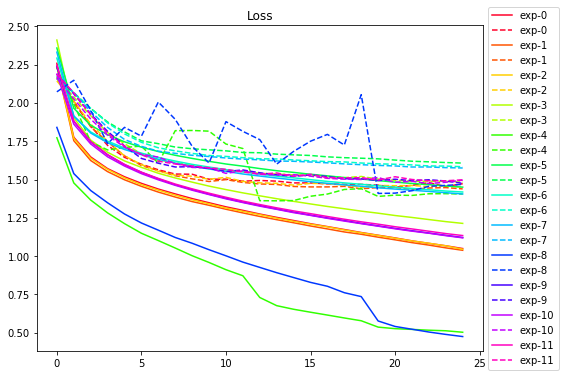

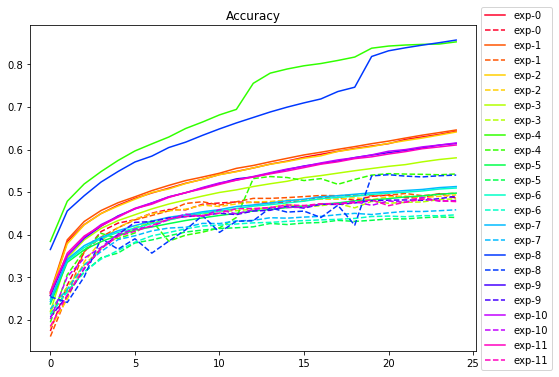

In [23]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = len(results.keys())

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()